In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [19]:
input_address = 'D:/My Job/DataMining/My Wheels/Data/output'
file_name = 'data2.xlsx'
df_orig = pd.read_excel(input_address + '/' + file_name,index_col=0)
#make even the good and bad 

df_orig = df_orig.sort_values(by=['GOOD'], ascending=False)
df = df_orig[4842:]
weighted_good = len(df_orig)/len(df_orig[4842:])

In [21]:
df.columns

Index(['AGEOTD', 'AGEAVG', 'TRADES', 'TOTBAL', 'HSATRT', 'CURSAT', 'BRTRDS',
       'BROPEN', 'BROLDT', 'BRHS2X', 'BRHS3X', 'BRHS4X', 'BRHS5X', 'AUUTIL',
       'CFTRDS', 'INQ012', 'PUBREC', 'BKTIME', 'CBTYPE', 'ACCTNO', 'VAGE',
       'VRESMOS', 'VJOBMOS', 'VDDASAV', 'BAD', 'GOOD', 'TERM', 'DWNPMT',
       'NTTRIN', 'BSWHOL', 'BSRETL', 'MAKE', 'MODEL', 'MILEAG', 'NEWUSE',
       'MNGPAY', 'CONTPR', 'RVOLDT', 'TROP24', 'OREVTR', 'RVTRDS', 'ORVTB0',
       'HST79X', 'HST03X', 'TIME29', 'TIME39', 'TIME49', 'CSORAT', 'T2924X',
       'T3924X', 'T4924X', 'BRBAL1', 'REHSAT', 'BKRETL', 'MODLYR'],
      dtype='object')

In [7]:
model = KMeans(n_clusters=4)

In [8]:
model.fit(df[['AGEOTD', 'AGEAVG' , 'INQ012']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
model.cluster_centers_

array([[ 65.24326311,  25.82732729,   3.38755512],
       [258.18373494,  86.98638554,   3.82831325],
       [131.58889482,  52.00929525,   3.64655633],
       [ 12.21489873,   3.7997288 ,   2.41400618]])

In [10]:
model.inertia_

6659332.320095975

In [12]:
model.labels_

array([3, 2, 3, ..., 0, 0, 3])

In [13]:
model.n_iter_

9

In [14]:
df.columns

Index(['AGEOTD', 'AGEAVG', 'TRADES', 'TOTBAL', 'HSATRT', 'CURSAT', 'BRTRDS',
       'BROPEN', 'BROLDT', 'BRHS2X', 'BRHS3X', 'BRHS4X', 'BRHS5X', 'AUUTIL',
       'CFTRDS', 'INQ012', 'PUBREC', 'BKTIME', 'CBTYPE', 'ACCTNO', 'VAGE',
       'VRESMOS', 'VJOBMOS', 'VDDASAV', 'BAD', 'GOOD', 'TERM', 'DWNPMT',
       'NTTRIN', 'BSWHOL', 'BSRETL', 'MAKE', 'MODEL', 'MILEAG', 'NEWUSE',
       'MNGPAY', 'CONTPR', 'RVOLDT', 'TROP24', 'OREVTR', 'RVTRDS', 'ORVTB0',
       'HST79X', 'HST03X', 'TIME29', 'TIME39', 'TIME49', 'CSORAT', 'T2924X',
       'T3924X', 'T4924X', 'BRBAL1', 'REHSAT', 'BKRETL', 'MODLYR'],
      dtype='object')

In [15]:
dff = df[['AGEOTD','GOOD']].copy()

In [16]:
dff['Label'] = model.labels_

In [17]:
dff.head()

,AGEOTD,GOOD,Label
Obs,,,
10963,40,1,3
10964,134,1,2
10965,-3,1,3
10967,81,1,0
10969,35,1,3


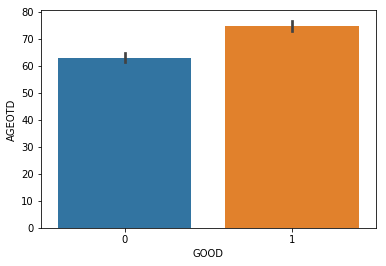

In [18]:
sns.barplot(df['GOOD'],df['AGEOTD'])

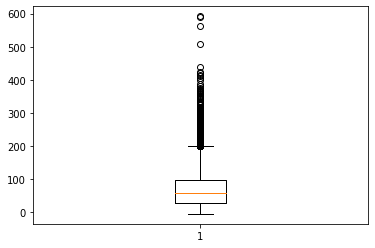

In [35]:
plt.boxplot(dff['AGEOTD']);

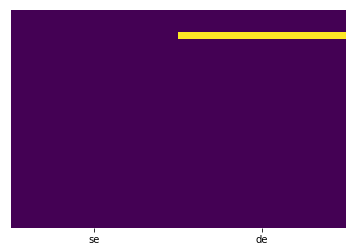

In [114]:
#Find null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

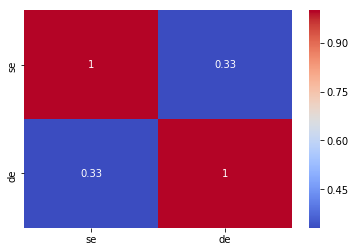

In [111]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [51]:
#  Crosstabulate

def crosstab(data=dff, attribute= 'AGEOTD', dependent_var='GOOD', lower_bound=85, upper_bound=95 ):
    
    all_count = data[dependent_var].count()
    total_good_count = data[dependent_var].sum()
    total_bad_count = all_count - total_good_count
    
    
    bucket_count = data[dependent_var][(data[attribute]>=lower_bound)&(data[attribute]<upper_bound)].count()
    good_count = data[dependent_var][(data[attribute]>=lower_bound)&(data[attribute]<upper_bound)].sum()    
    bad_count = bucket_count - good_count
    
    percentage = (bucket_count/all_count)*100
    good_portion = (good_count/total_good_count)*100
    bad_portion = (bad_count/total_bad_count)*100
    ratio_G_B = good_portion/bad_portion
     
    
    return (print(f"Data Included:\t\t{percentage.round(2)}%\nBAD_Count:\t\t{bad_count}\nBAD_percentage:\t\t{bad_portion.round(2)}%\
    \nGOOD_Count:\t\t{good_count}\nGOOD_percentage:\t{good_portion.round(2)}%\
    \nTotal:\t\t\t{bucket_count}\nRation G/B:\t\t{ratio_G_B.round(2)}\nTotal GOOD count:\t{total_good_count}\
    \nTotal BAD count:\t{total_bad_count}\nTotal_Total_count:\t{all_count}"))

In [52]:
crosstab( data=dff, attribute= 'AGEOTD', dependent_var='GOOD', lower_bound=85, upper_bound=95)

Data Included:		5.03%
BAD_Count:		220
BAD_percentage:		4.78%    
GOOD_Count:		243
GOOD_percentage:	5.28%    
Total:			463
Ration G/B:		1.1
Total GOOD count:	4600    
Total BAD count:	4600
Total_Total_count:	9200


In [26]:
from sklearn.decomposition import PCA


In [40]:
pca_model = PCA(n_components=1)

In [45]:
pca_model.fit_transform(X[['AGEOTD', 'AGEAVG' , 'INQ012']])

array([[-32.46399679],
       [ 65.96739305],
       [-77.62294124],
       ...,
       [ -7.5226088 ],
       [ 15.45151185],
       [-76.39886576]])

In [33]:
X[['AGEOTD', 'AGEAVG' , 'INQ012']].head()

,AGEOTD,AGEAVG,INQ012
Obs,,,
10963,40,11.00,2
10964,134,40.43,9
10965,-3,-3.00,6
10967,81,24.13,3
10969,35,10.00,3


In [46]:
pca_model.components_

array([[0.93858091, 0.3449791 , 0.00743557]])

In [48]:
pca_model.n_features_

3

In [49]:
pca_model.mean_

array([68.9226087 , 26.39007065,  3.14793478])

In [51]:
X[['AGEOTD', 'AGEAVG' , 'INQ012']].mean()

AGEOTD    68.922609
AGEAVG    26.390071
INQ012     3.147935
dtype: float64

In [112]:
a = dict(se=[1,2,3,4,5,6,7,8,9,9,8,7,6,5,4,3,2,1,2,3,4,5,6,7,8,9,1,2,3,4],
         de=[1,2,3,np.nan,5,6,7,6,5,4,3,2,3,4,5,3,2,4,5,6,5,4,3,2,3,22,1,2,12,5])

In [113]:
df = pd.DataFrame(a)

In [95]:
df


,se,de
0,1,1.0
1,2,2.0
2,3,3.0
3,4,NaN
4,5,5.0
5,6,6.0
6,7,7.0
7,8,6.0
8,9,5.0
9,9,4.0


In [96]:
models = PCA(n_components=1)

In [66]:
models.fit_transform(df.fillna(value=10,axis=1)).round(2)

array([[-4.22],
       [-2.9 ],
       [-1.57],
       [ 5.22],
       [ 1.07],
       [ 2.4 ]])

In [98]:
value ={'se':df['se'].mean(),'de':df['de'].mean()}
df = df.fillna(value=value)

In [101]:
for i in df:
    if i 

TypeError: count() takes at least 1 argument (0 given)